In [1]:
# импортируем библиотеки
import requests
from bs4 import BeautifulSoup as bs
from pprint import pprint
import re
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('Тестовое задание - tz_data.csv')
df.head(2)

,area,cluster,cluster_name,keyword,good (1),count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1.0,1260,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,1.0,866,14.829280,7.8507285727125815


**1) В выходной таблице должны остаться только следующие колонки:  area, cluster, cluster_name, keyword, x, y, count, color**

In [3]:
# оставим только требуемые признаки (согласно перечню в задании):
df.drop(['good (1)'], axis=1, inplace=True)

In [4]:
df.head(2)

,area,cluster,cluster_name,keyword,count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1260,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,866,14.829280,7.8507285727125815


In [5]:
# количество областей
df.area.value_counts().count()

15

In [6]:
# количество значений внутри каждой области:
df.area.value_counts()

eligibility    16
twisted        16
greetings      16
capability     15
available      15
protein        15
winner         15
locator        15
worlds         15
ar\vr          15
lithuania      15
personnel      15
housewives     15
dialog         15
except         15
Name: area, dtype: int64

In [7]:
# Вывод по предыдущей ячейке: достаточно 16 цветов для обозначения словосоченаний внутри каждой области.
# составим массив цветов (возьмем Tableau 20):

colors = ['#9edae5',    '#17becf',    '#dbdb8d',    '#bcbd22',    '#c7c7c7',
          '#7f7f7f',    '#f7b6d2',    '#e377c2',    '#c49c94',    '#8c564b',
          '#c5b0d5',    '#9467bd',   ' #ff9896',    '#d62728',    '#98df8a',
          '#2ca02c',   ' #ffbb78',    '#ff7f0e',    '#aec7e8',    '#1f77b4']


**3) Не должно быть дубликатов слов в одной и той же области (area), но словосочетание может повторяться из area в area**

In [8]:
df_ready = df
df_key = df
df_key.shape

(229, 7)

In [9]:
#  получим список областей
name_area = df.area.unique()

In [10]:
_df_ = pd.DataFrame()
for i in name_area:
    df_ = df_key.loc[(df_key.area == i)].drop_duplicates(subset='keyword')
    _df_ = pd.concat([_df_, df_])
print(_df_.shape)
df_key = _df_

(221, 7)


In [11]:
df_key.head(3)

,area,cluster,cluster_name,keyword,count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1260,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,866,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,163,11.381856,3.8981370219558604


**2) Колонку color нужно добавить самостоятельно - цвета вы можете взять из цветовых палеток Tableu или по своему усмотрению.**<br>

3) Цвет задается каждому словосочетанию согласно следующими правилам:<br>
- внутри одной области цвета словосочетаний в одном кластере должны быть одинаковые, в разных - отличаться (например, у "Кластер 1" все слова будут окрашены в красный, у "Кластер 2" - в зеленый и т.д.)<br>
- цвета кластеров в разных областях могут повторяться<br>
- цвета кластеров в разных областях с разным номером не имеют никакой связи (у одной области [area] слова из "Кластер 1" могут быть красного цвета, в другой области у слов из "Кластер 1" может быть другой цвет)<br>



In [31]:
# введем дополнительный признак 'color'
# внесем в него значение цвета 

df_key['color'] = 0
for i in name_area:
    #  можем получить список ниаменований кластеров (для любой области)
    count_clusters = df_key.loc[df_key.area == i].cluster_name.unique()
    for j in count_clusters:
        # получим цвет кластера из массива colors по номеру кластера
        cluster_color = int(j.split(' ')[1])
        df_key.loc[(df_key.area == i) & (df_key.cluster_name == j), 'color'] = colors[cluster_color]
df_key.head(5)

,area,cluster,cluster_name,keyword,count,x,y,color
109,ar\vr,0.0,Кластер 0,committees parallel,173.0,6.735260,3.613983,#9edae5
107,ar\vr,0.0,Кластер 0,interfaces neutral,586.0,10.443533,13.809915,#9edae5
108,ar\vr,0.0,Кластер 0,reservations linking,751.0,10.195602,12.259496,#9edae5
106,ar\vr,0.0,Кластер 0,written conflict fabulous,1443.0,2.991167,7.106799,#9edae5
113,ar\vr,1.0,Кластер 1,celtic automation,715.0,12.197275,4.723751,#17becf


4) Сортировка должна происходить по колонкам<br> area, cluster, cluster_name, count (по count значения сортируются в убывающем порядке, в остальных - по возрастающему).


In [18]:
df_sort = df_key

In [32]:
# преобразуем тип данных признака 'count' к числовому (float64)
df_sort['count'] = pd.to_numeric(df_sort['count'], errors='coerce') 
df_sort['y'] = pd.to_numeric(df_sort['y'], errors='coerce') 
df_sort['count'].dtype
df_sort['y'].dtype

dtype('float64')

In [33]:
# сортируем данные
df_sort.sort_values(by=['count'], ascending=True, inplace=True)
df_sort.sort_values(by=['area', 'cluster', 'cluster_name'], inplace=True)
df_sort.head(6)

,area,cluster,cluster_name,keyword,count,x,y,color
109,ar\vr,0.0,Кластер 0,committees parallel,173.0,6.735260,3.613983,#9edae5
107,ar\vr,0.0,Кластер 0,interfaces neutral,586.0,10.443533,13.809915,#9edae5
108,ar\vr,0.0,Кластер 0,reservations linking,751.0,10.195602,12.259496,#9edae5
106,ar\vr,0.0,Кластер 0,written conflict fabulous,1443.0,2.991167,7.106799,#9edae5
113,ar\vr,1.0,Кластер 1,celtic automation,715.0,12.197275,4.723751,#17becf
111,ar\vr,1.0,Кластер 1,filling volunteers academics,773.0,10.833920,8.652737,#17becf


In [34]:
# сохраним в xlsx
df_sort.to_excel('df.xlsx')

In [35]:
df_1 = df_key.loc[(df_key.area == 'available')]
df_1

,area,cluster,cluster_name,keyword,count,x,y,color
34,available,0.0,Кластер 0,mobiles sensor,426.0,14.916619,5.807536,#9edae5
31,available,0.0,Кластер 0,michael tobacco oriented,1433.0,2.534541,7.201312,#9edae5
32,available,0.0,Кластер 0,engage gazette,1694.0,13.577056,14.568348,#9edae5
33,available,0.0,Кластер 0,containers raises,1901.0,11.553724,14.838973,#9edae5
38,available,1.0,Кластер 1,minerals reception,907.0,5.198257,14.817618,#17becf
37,available,1.0,Кластер 1,correctly washing trauma,910.0,0.854609,2.854567,#17becf
36,available,1.0,Кластер 1,collectables departments,1247.0,11.166087,12.985123,#17becf
35,available,1.0,Кластер 1,signed reception,1793.0,9.560871,6.234035,#17becf
41,available,2.0,Кластер 2,disposition layout,454.0,0.990871,6.513207,#dbdb8d
42,available,2.0,Кластер 2,optimal artificial orders complicated,1037.0,13.203286,14.374206,#dbdb8d


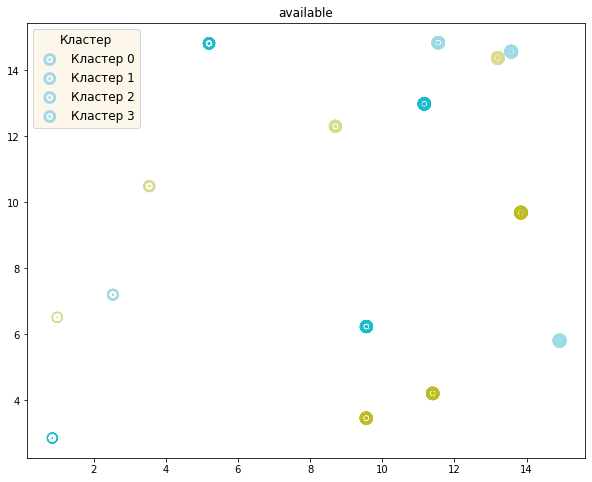

In [37]:
# На примере одной из области покажем построение графика точек из датасета. 

fig, ax = plt.subplots()

for i in df_1:
    ax.scatter(df_1.x, df_1.y,
                   c = df_1.color,          #  цвет точек
                   linewidths = 10,        #  размер точек
                   s = df_1.x,
               
                      )     
        

# for i in name_area:
    #  можем получить список ниаменований кластеров (для любой области)
    count_clusters = df_key.loc[df_key.area == name_area[2]].cluster_name.unique()
    for j in count_clusters:
        # получим цвет кластера из массива colors по номеру кластера
        cluster_color = int(j.split(' ')[1])
        df_key.loc[(df_key.area == i) & (df_key.cluster_name == j), 'color'] = colors[cluster_color]
df_key.head(5)        
        
        
ax.legend(df_key.loc[df_key.area == 'available'].cluster_name.unique(),
          fontsize = 12,
          facecolor = 'oldlace',    #  цвет области
          title = 'Кластер',    #  заголовок
          title_fontsize = '12'    #  размер шрифта заголовка
         )


ax.set_facecolor('white')     #  цвет области Axes
ax.set_title('available')     #  заголовок для Axes

fig.set_figwidth(10)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.savefig('график dpi 1500.png', dpi = 1500)

